In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cd /content/drive/MyDrive/nlp-for-book-recommendation-main/nlp-for-book-recommendation-main/

/content/drive/MyDrive/nlp-for-book-recommendation-main/nlp-for-book-recommendation-main


In [8]:
# Read the data
data = pd.read_csv("data/goodreads_book.csv")
# Only keep columns we need
data.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews
0,1000000,Flight from Eden,Kathryn A. Graham,0595199402,4.00,2001,1,10,Writer's Showcase Press,5:1,4:1,3:1,2:0,1:0,total:3,1,NaN,380,"What could a computer expert, a mercenary with...",1
1,1000001,Roommates Again,Kathryn O. Galbraith,0689505973,3.20,1994,1,4,Margaret K. McElderry Books,5:0,4:3,3:1,2:0,1:1,total:5,1,NaN,44,"During their stay at Camp Sleep-Away, sisters ...",1
2,1000003,The King At The Door,Brock Cole,0374440417,3.95,1992,31,12,Farrar Straus Giroux,5:5,4:9,3:4,2:1,1:0,total:19,0,NaN,32,A poorly dressed old man appears at an inn and...,0
3,1000004,"Giotto: The Scrovegni Chapel, Padua",Bruce Cole,080761310X,4.47,1993,1,8,George Braziller,5:9,4:5,3:0,2:1,1:0,total:15,2,NaN,118,This beautiful series lavishly illustrates the...,2
4,1000005,Larky Mavis,Brock Cole,0374343659,3.69,2001,3,8,"Farrar, Straus and Giroux (BYR)",5:19,4:12,3:9,2:7,1:4,total:51,8,NaN,32,<b>Another orginal picture-book fairy tale</b>...,8


In [9]:
# Check column names
data.columns

Index(['Id', 'Name', 'Authors', 'ISBN', 'Rating', 'PublishYear',
       'PublishMonth', 'PublishDay', 'Publisher', 'RatingDist5', 'RatingDist4',
       'RatingDist3', 'RatingDist2', 'RatingDist1', 'RatingDistTotal',
       'CountsOfReview', 'Language', 'pagesNumber', 'Description',
       'Count of text reviews'],
      dtype='object')

---
### Filter Columns

In [10]:
# Only keep columns we need
eda_data = data[['Id', 'Name', 'Authors', 'ISBN', 'PublishYear', 'Publisher', 'Language', 'Description']].copy()
eda_data.head()

,Id,Name,Authors,ISBN,PublishYear,Publisher,Language,Description
0,1000000,Flight from Eden,Kathryn A. Graham,0595199402,2001,Writer's Showcase Press,NaN,"What could a computer expert, a mercenary with..."
1,1000001,Roommates Again,Kathryn O. Galbraith,0689505973,1994,Margaret K. McElderry Books,NaN,"During their stay at Camp Sleep-Away, sisters ..."
2,1000003,The King At The Door,Brock Cole,0374440417,1992,Farrar Straus Giroux,NaN,A poorly dressed old man appears at an inn and...
3,1000004,"Giotto: The Scrovegni Chapel, Padua",Bruce Cole,080761310X,1993,George Braziller,NaN,This beautiful series lavishly illustrates the...
4,1000005,Larky Mavis,Brock Cole,0374343659,2001,"Farrar, Straus and Giroux (BYR)",NaN,<b>Another orginal picture-book fairy tale</b>...


In [11]:
# Find number of smaples and features
eda_data.shape

(39705, 8)

In [12]:
# Check data types of features
eda_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39705 entries, 0 to 39704
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           39705 non-null  int64 
 1   Name         39705 non-null  object
 2   Authors      39705 non-null  object
 3   ISBN         39577 non-null  object
 4   PublishYear  39705 non-null  int64 
 5   Publisher    39345 non-null  object
 6   Language     7013 non-null   object
 7   Description  34559 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


---
# Data Cleaning

### Find missing values and replace with appropriate substitution.

In [13]:
# Find number of NaN in each column
eda_data.isna().sum()

,0
Id,0
Name,0
Authors,0
ISBN,128
PublishYear,0
Publisher,360
Language,32692
Description,5146


In [14]:
eda_data.Language.unique()

array([nan, 'eng', 'fre', 'en-US', 'en-GB', 'spa', 'ger', 'ita', 'jpn',
       'en-CA', 'nl', 'lat', 'cat', 'cze', 'grc', 'por', 'per', 'rus',
       'mul', 'swe', 'ind', 'rum', 'raj', 'ang', 'afr', 'eus', 'zho',
       'ypk', 'gle', 'frm', 'tur'], dtype=object)

---
### Replace missing publisher info with unknown

In [15]:
eda_data[["Publisher"]] = eda_data[["Publisher"]].fillna("unknown")

In [16]:
eda_data.isna().sum()

,0
Id,0
Name,0
Authors,0
ISBN,128
PublishYear,0
Publisher,0
Language,32692
Description,5146


---
### Remove rows with missing description

In [17]:
# Remove rows having atleast ine NaN in any feature
# eda_data.dropna(axis=0, how="any", inplace=True)
eda_data.dropna(subset=["Description"], inplace=True)

---
### Remove URLs from the description

In [18]:
list(eda_data.Description[eda_data.Id == 1099555]) #Description with url and html tag

['<i>Alternate Cover Edition can be found <a href="https://www.goodreads.com/book/show/38559855" rel="nofollow">here</a></i><br /><br />Das Böse hält keinen Winterschlaf.<br />Kathy Reichs auch nicht.<br /><br /><br />Was könnte frostiger sein als ein kanadischer Dezembersturm? Tempe Brennan, forensische Anthropologin in Montreal, wird an einem tristen Montagmorgen zu einem Fundort gerufen, der ihr das Blut in den Adern gefrieren lässt. Verscharrt in einem Kellergewölbe liegen die Leichen dreier junger Frauen. Nicht eine Gewebefaser, kein Fetzen Kleidung geben Aufschluss darüber, wann und warum diese Mädchen sterben mussten. Nur dank akribischer Ermittlungen und weiblicher Intuition kommt Tempe dem Mörder auf die Spur. Doch sie muss auf alles gefasst sein, denn ihr Gegner ist an Kaltblütigkeit nicht zu übertreffen …<br /><br /><br />Tempe Brennans siebter Fall.<br /><br /><br /><br /><br />']

In [19]:
import re
url_pattern = re.compile(r'https?://\S+|www\.\S+')
def remove_url(text):
    return re.sub(url_pattern, r'', text)

eda_data.Description = eda_data.Description.apply(remove_url)

---
### Remove html tags from the description.

In [20]:
html_pattern = re.compile('<[^>]*>')
def clean_html_tags(text):
    return re.sub(html_pattern, r'', text)

eda_data.Description = eda_data.Description.apply(clean_html_tags)

In [21]:
list(eda_data.Description[eda_data.Id == 1099555])

['Alternate Cover Edition can be found hereDas Böse hält keinen Winterschlaf.Kathy Reichs auch nicht.Was könnte frostiger sein als ein kanadischer Dezembersturm? Tempe Brennan, forensische Anthropologin in Montreal, wird an einem tristen Montagmorgen zu einem Fundort gerufen, der ihr das Blut in den Adern gefrieren lässt. Verscharrt in einem Kellergewölbe liegen die Leichen dreier junger Frauen. Nicht eine Gewebefaser, kein Fetzen Kleidung geben Aufschluss darüber, wann und warum diese Mädchen sterben mussten. Nur dank akribischer Ermittlungen und weiblicher Intuition kommt Tempe dem Mörder auf die Spur. Doch sie muss auf alles gefasst sein, denn ihr Gegner ist an Kaltblütigkeit nicht zu übertreffen …Tempe Brennans siebter Fall.']

---
### Remove punctuations from the description

In [22]:
import string
punctuations = string.punctuation
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', punctuations))

eda_data.Description = eda_data.Description.apply(remove_punctuations)

In [23]:
eda_data.Description.head(5)

,Description
0,What could a computer expert a mercenary with ...
1,During their stay at Camp SleepAway sisters Be...
2,A poorly dressed old man appears at an inn and...
3,This beautiful series lavishly illustrates the...
4,Another orginal picturebook fairy taleLarky Ma...


---
### Remove extra spaces from the text columns and convert the lettercase to lower

In [24]:
eda_data[["Name", "Authors", "Publisher", "Description"]] = pd.concat([eda_data[col].astype(str).str.lower().str.strip() for col in ["Name", "Authors", "Publisher", "Description"]], axis=1)
eda_data.head()

,Id,Name,Authors,ISBN,PublishYear,Publisher,Language,Description
0,1000000,flight from eden,kathryn a. graham,0595199402,2001,writer's showcase press,NaN,what could a computer expert a mercenary with ...
1,1000001,roommates again,kathryn o. galbraith,0689505973,1994,margaret k. mcelderry books,NaN,during their stay at camp sleepaway sisters be...
2,1000003,the king at the door,brock cole,0374440417,1992,farrar straus giroux,NaN,a poorly dressed old man appears at an inn and...
3,1000004,"giotto: the scrovegni chapel, padua",bruce cole,080761310X,1993,george braziller,NaN,this beautiful series lavishly illustrates the...
4,1000005,larky mavis,brock cole,0374343659,2001,"farrar, straus and giroux (byr)",NaN,another orginal picturebook fairy talelarky ma...


---
### Find book descriptions with very short length and remove them.

In [25]:
eda_data["length"] = [len(d.split()) for d in eda_data['Description'].tolist()]
eda_data[eda_data.length.isin(range(0,4))][["Id", "Name", "Description", "length"]]\
.sort_values(by=["length"], ascending=True).head(10)

,Id,Name,Description,length
2327,1005785,tag-along tails: ring tailed lemur,,0
31889,1079751,mahmoud ahmadinejad: president of iran,,0
30582,1076433,buddhism,,0
5751,1013931,"mixed feelings: feminism, mass culture, and v...",,0
28889,1072133,frequently asked questions about being gifted,,0
7523,1018569,ballad of santo casiero,,0
28887,1072128,frequently asked questions about stuttering,,0
636,1001461,barbarism,poetry,1
36831,1092143,nighthawk f-117 stealth fighter,new,1
28972,1072319,the milk group,none,1


- As we have removed tags we see empty strings in the description, lets first convert them to NaN and then remove them

In [26]:
# Replace empty strings of description with NaN
eda_data.Description = eda_data.Description.replace(r'^\s*$', np.nan, regex=True)

eda_data[eda_data.length.isin(range(0,4))][["Id", "Name", "Description", "length"]]\
.sort_values(by=["length"], ascending=True).head()

,Id,Name,Description,length
2327,1005785,tag-along tails: ring tailed lemur,NaN,0
31889,1079751,mahmoud ahmadinejad: president of iran,NaN,0
30582,1076433,buddhism,NaN,0
5751,1013931,"mixed feelings: feminism, mass culture, and v...",NaN,0
28889,1072133,frequently asked questions about being gifted,NaN,0


In [27]:
eda_data.dropna(subset=["Description"], inplace=True)

eda_data[eda_data.length.isin(range(0,4))][["Id", "Name", "Description", "length"]]\
.sort_values(by=["length"], ascending=True).head()

,Id,Name,Description,length
636,1001461,barbarism,poetry,1
24941,1062171,middlemarch: in half the time,abridged,1
17626,1043889,"to the nines (stephanie plum, #9)",1593977484,1
26421,1065801,the bird lovers,drama,1
26889,1066895,凤凰集,本集共收《在私塾》、《往事》、《常德的船》、《凤凰》等10篇散文。,1


In [28]:
print(set(eda_data.Description[eda_data.length.isin(range(0,4))]))

{'noel polk editor', 'print on demand', 'vol 1of 2', 'yasuhiro nakasone', 'english and italian', 'textformat02gt', 'abridged', 'the understanding', 'ranma ½ 7', 'revised and updated', 'recreation of landscape', 'haynes', '《文化、權力與國家1900—1942年的華北農村》是美國學者杜贊奇的名著。杜贊奇（prasenjit duara），早年就學於印度，後赴美國求學，師從著名漢學大師孔飛力，現任美國芝加哥大學歷史學系及東亞語言文明系教授。其著作除本書外，還有廣為學界選舉的《從民族國家拯救歷史》。此兩書使杜贊奇成為名聞國際的漢學家。本書是以鄉村的文化網絡為基本結構並考察其功能力，作者主要利用日本南滿鐵道株式會社調查部編撰的《中國慣行調查報告》、南開大學經濟研究所在20世紀二三十年代所做的社會調查材料，以及中外學者已有的研究成果，通過細致的個案研究，向我們展示了1900—1942年間華北農村社會的政治經濟文化的一般狀況。作者力圖打通歷史學與社會學的間隔，提出了「國家政權建設」和「權力的文化網絡」兩個中心概念。作者認為，「國家政權建設」是一種全球性現象，作為一個概念，同更古老的「資本主義」等概念一樣，具有深遠的分析性含義。「權力的文化網絡」概念則吸收了西方學術界有關文化研究的成果，反對一些現代化論者用單一社會體系或一套所謂的「中國價值觀」去理解中國的觀點，同時也反對認為價值觀點交互感應的功能主義論者的學說。最重要的一點是，作者在書中貫穿了這樣一種方法在考慮話語—主體—制度這三者對歷史的建構時，應加入許多外來事物和偶然因素，因為參與主體和主體性構成的不僅有話語，還有外來事物；而由主體構建的制度，還應包括制度本身的邏輯性和偶然性。本書曾先後榮獲1989年度的美國歷史學會費正清獎以及1900年度的亞洲研究學會列文森獎。', '本集共收《在私塾》、《往事》、《常德的船》、《凤凰》等10篇散文。', 'level a', 'poetry', 'bild wissensbibliothek', 'drama', 'undefined', 'grades 612', '

In [29]:
# Drop records with very short description
eda_data.drop(eda_data.index[eda_data.length.isin(range(0,4))], inplace = True)
print(eda_data[eda_data.length.isin(range(0,4))].shape[0])
del eda_data["length"]

0


---
### Find if there is duplication of rows/features

In [30]:
# Find number of duplicated rows
eda_data[eda_data.duplicated()==True].shape[0]

0

In [31]:
# Find number of duplicated values of each feature
eda_data.shape[0] - eda_data.nunique()

,0
Id,0
Name,107
Authors,9326
ISBN,87
PublishYear,34425
Publisher,28483
Language,34488
Description,457


---
### Drop variants of the same book
- We see that some descriptions are repeated this possibly could be due to different versions of the same book. ISBN has missing values. Repeated values in Authors, Publisher can help in book recommedation.
- We see that same books have different ISBN becuase an ISBN is assigned to each separate edition and variation of a publication. ISBN is like an identity number for each edition, imprint, impression or version of the same book. For example, an e-book, a paperback and a hardcover edition of the same book will each have a different ISBN (except reprintings).
- Only keep variants where Publisher is not null, if Publisher is missing for all the variants then keep the first occurrence and delete rest.

In [32]:
# Convert unknown to NaN
eda_data["Publisher"] = eda_data.Publisher.replace('unknown',np.nan)

# Find books that have same Name Author, Description and Publisher
eda_data[eda_data.duplicated(subset=["Name", "Authors", "Description"], keep=False)][["Id", "ISBN", "Name", "Authors", "Publisher", "Language", "Description"]].head(10)

,Id,ISBN,Name,Authors,Publisher,Language,Description
1323,1003113,0575041218,bring the jubilee,ward moore,NaN,eng,a classic alternate history story the first t...
1324,1003114,1557850321,bring the jubilee,ward moore,bart books (ny),eng,a classic alternate history story the first t...
1384,1003324,0450049124,the war hound and the world's pain,michael moorcock,NaN,NaN,the basic premise is that lucifer isnt an omni...
1385,1003326,0671604090,the war hound and the world's pain,michael moorcock,NaN,eng,the basic premise is that lucifer isnt an omni...
1696,1004056,0771091680,a strange manuscript found in a copper cylinder,james de mille,mcclelland and stewart,NaN,with its curious mixture of adventure natural ...
1697,1004057,0773521674,a strange manuscript found in a copper cylinder,james de mille,mcgill-queen's university press,NaN,with its curious mixture of adventure natural ...
1740,1004146,0140817875,doctor jekyll and mr.hyde,robert louis stevenson,penguin books ltd,NaN,strange case of dr jekyll and mr hyde is the o...
1895,1004551,0884118711,the day of the locust,nathanael west,amereon limited,NaN,the day of the locust is a novel about hollywo...
1896,1004552,0552097535,the day of the locust,nathanael west,corgi,NaN,the day of the locust is a novel about hollywo...
1987,1004827,1841951560,doctor jekyll and mr.hyde,robert louis stevenson,evans brothers,eng,strange case of dr jekyll and mr hyde is the o...


In [33]:
eda_data = eda_data.sort_values(by="Publisher", na_position='last').drop_duplicates(subset=["Name", "Authors", "Description"], keep='first')

- Though we have deleted rows with same name, authors and description, when we find books having duplicated description we observe certain records, this happens due to minor textual changes in the Name of the book and also because ceratin descriptions are repetitive for different books.

In [34]:
eda_data[eda_data.duplicated(subset=["Description"], keep=False)][["Id", "ISBN", "Name", "Authors", "Publisher", "Language", "Description"]]

,Id,ISBN,Name,Authors,Publisher,Language,Description
38130,1095708,1421899116,thou shalt not think; the brutally frank guide...,david jack,1st world publishing,NaN,every once in awhile there comes a book of suc...
38129,1095704,1421899108,thou shalt not think: the brutally frank guide...,david jack,1st world publishing,NaN,every once in awhile there comes a book of suc...
1538,1003725,0713628278,"comet in moominland (the moomins, #2)",tove jansson,a & c black,eng,when moomintroll learns that a comet will be p...
16882,1042305,1599287803,belgium,kristin van cleaf,abdo publishing company,NaN,fullcolor photographs diagrams index bolded gl...
35403,1088595,0441768040,the souix spaceman,andre norton,ace,NaN,kade whitehawk had two strikes against him in ...
...,...,...,...,...,...,...,...
4538,1011169,1569314462,"magical pokemon, volume 1: how do you do, pika...",yumi tsukirino,NaN,NaN,the first pokemon comic created especially for...
8839,1021932,0399138307,the cat who went into the closet,lilian jackson braun,NaN,NaN,the cat who went into the closet
21087,1052431,0819601608,literature and insurgency: ten studies in raci...,john curtis underwood,NaN,NaN,this scarce antiquarian book is included in ou...
29486,1073620,143460666X,the life of nelson volume 2 (large print editi...,alfred thayer mahan,NaN,NaN,this is a pre1923 historical reproduction that...


---
### Extract book series information from the name of the book
- Remove irrelevant info from the name of the book to improve efficiency of the tokenization.
- Book names with hashtag represent edition of the book in a series

In [35]:
series_pattern =  "(?:[;]\s*|\(\s*)([^\(;]*\s*#\s*\d+(?:\.?\d+|\\&\d+|-?\d*))"
def get_book_series_info(text):
    series_info = re.findall(series_pattern, text)
    if series_info:
        series_info = " ".join([i.replace(" ", "_") for i in series_info])
        return series_info
    else:
        return np.nan


eda_data['BookSeriesInfo'] = eda_data.Name.apply(get_book_series_info)

book_name_cases = ["Sire Lines, Revised Edition (Blood-Horse Classics Library)",
                   "Lovers and Ladies (Lovers and Ladies, #5&6)",
                   "Oh, Cuan Lejos Llegaras! (Oh, the Places You'll Go!", "Ranma 1/2, Vol. 28 (Ranma ½ (US 2nd), #28)",
                   "Fairy Realm edition, #1-3 (Fairy Realm, #1-3)", "Fairy Realm edition, #1.3 (Fairy Realm, #1.3)",
                   "Codes: How to Make Them and Break Them (Murderous Maths, # 14)",
                   "The Best Catch In Texas (Men of the West, #10) (Silhouette Special Edition #1814)",
                   "Patriot Games ((Blood-Horse Classics Library)) (Jack Ryan, #1; Jack Ryan Universe, #2)"]

print("\033[1m{:90}\033[0m\033[1m{:5}\033[0m".format("Book Name", "Series Information"))
for name in book_name_cases:
    print("{!s:90}{!s:5}".format(name, get_book_series_info(name)))


Book Name                                                                                 Series Information
Sire Lines, Revised Edition (Blood-Horse Classics Library)                                nan  
Lovers and Ladies (Lovers and Ladies, #5&6)                                               Lovers_and_Ladies,_#5&6
Oh, Cuan Lejos Llegaras! (Oh, the Places You'll Go!                                       nan  
Ranma 1/2, Vol. 28 (Ranma ½ (US 2nd), #28)                                                US_2nd),_#28
Fairy Realm edition, #1-3 (Fairy Realm, #1-3)                                             Fairy_Realm,_#1-3
Fairy Realm edition, #1.3 (Fairy Realm, #1.3)                                             Fairy_Realm,_#1.3
Codes: How to Make Them and Break Them (Murderous Maths, # 14)                            Murderous_Maths,_#_14
The Best Catch In Texas (Men of the West, #10) (Silhouette Special Edition #1814)         Men_of_the_West,_#10 Silhouette_Special_Edition_#1814
Patriot Ga

- As we are using regex there will be certain exceptions, for example it misses a book name with nested brackets case. The name of the book is "Ranma 1/2, Vol. 28 (Ranma ½ (US 2nd), #28)", it should extract series information as `Ranma ½ (US 2nd), #28]`, instead, it extracts `[US 2nd), #28]`

In [36]:
eda_data[["Id","Name", "BookSeriesInfo"]][eda_data.BookSeriesInfo.isna() == False]

,Id,Name,BookSeriesInfo
1538,1003725,"comet in moominland (the moomins, #2)","the_moomins,_#2"
5758,1013940,the beast (grens & sundkvist #1),grens_&_sundkvist_#1
8375,1020812,"kill or cure (the afterblight chronicles, #2)","the_afterblight_chronicles,_#2"
9449,1023480,"the boy i love (the boy i love trilogy, #1)","the_boy_i_love_trilogy,_#1"
17865,1044430,"the laughing corpse (anita blake, vampire hunt...","anita_blake,_vampire_hunter_#2"
...,...,...,...
24047,1060056,"double tap (paul madriani, #8)","paul_madriani,_#8"
27648,1068944,seven up (stephanie plum #7),stephanie_plum_#7
28870,1072084,"zoff in der clique (for girls only, #1)","for_girls_only,_#1"
33331,1083382,"blood captain (vampirates, #3)","vampirates,_#3"


In [37]:
eda_data.isna().sum()

,0
Id,0
Name,0
Authors,0
ISBN,87
PublishYear,0
Publisher,228
Language,28171
Description,0
BookSeriesInfo,32380


---
### Remove the series info from the name of the book

In [40]:
series_remove_pattern = re.compile("(?:[\(]\s*[^\(;]*\s*#\s*\d+(?:\.?\d+|\\&\d+|-?\d*)(?:;|\))|\s*[^\(;]*\s*#\s*\d+(?:\.?\d+|\\&\d+|-?\d*)\))")
def remove_series_info(text):
    return re.sub(series_remove_pattern, r'', text)

print("\033[1m{:80}\033[0m\033[1m{:5}\033[0m".format("Book Name", "Series Information"))
for name in book_name_cases:
    print("{!s:80}{!s:5}".format(name, remove_series_info(name)))

eda_data["Title"]= eda_data["Name"].str.replace(series_remove_pattern, r'' , regex=True).str.strip()

Book Name                                                                       Series Information
Sire Lines, Revised Edition (Blood-Horse Classics Library)                      Sire Lines, Revised Edition (Blood-Horse Classics Library)
Lovers and Ladies (Lovers and Ladies, #5&6)                                     Lovers and Ladies 
Oh, Cuan Lejos Llegaras! (Oh, the Places You'll Go!                             Oh, Cuan Lejos Llegaras! (Oh, the Places You'll Go!
Ranma 1/2, Vol. 28 (Ranma ½ (US 2nd), #28)                                      Ranma 1/2, Vol. 28 (Ranma ½ 
Fairy Realm edition, #1-3 (Fairy Realm, #1-3)                                   Fairy Realm edition, #1-3 
Fairy Realm edition, #1.3 (Fairy Realm, #1.3)                                   Fairy Realm edition, #1.3 
Codes: How to Make Them and Break Them (Murderous Maths, # 14)                  Codes: How to Make Them and Break Them 
The Best Catch In Texas (Men of the West, #10) (Silhouette Special Edition #1814)The Bes

In [47]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

---
### Impute missing language with book title language

In [45]:
import nltk
from nltk.classify.textcat import TextCat
nltk.download('crubadan')
tc = TextCat()

def detect_language(text):
    # Check if text is NaN
    if pd.isna(text):
        return 'unknown'  # or any other appropriate value for missing language
    text = " ".join(text.split()[:5])
    if text.isnumeric():
        return 'eng'
    else:
        return tc.guess_language(text).strip()

[nltk_data] Downloading package crubadan to /root/nltk_data...
[nltk_data]   Package crubadan is already up-to-date!


In [48]:
import dask.dataframe as dd
import multiprocessing
ddf = dd.from_pandas(eda_data, npartitions=4*multiprocessing.cpu_count())
eda_data["Language"] = ddf.map_partitions(lambda df: df.apply(lambda x: detect_language(x['Name']) if pd.isna(x['Language']) else x['Language'], axis=1)).compute()

In [49]:
eda_data.isna().sum()

,0
Id,0
Name,0
Authors,0
ISBN,87
PublishYear,0
Publisher,228
Language,0
Description,0
BookSeriesInfo,32380
Title,0


---
### Remove quotes from Publisher column

In [50]:
eda_data["Publisher"] = eda_data["Publisher"].str.replace('"','')

---
### Transform book and author names into single token
- Merge first and last name of authors so that two authors with same first or last name are not considered same when the tokenization happens.
- Also merge name of the book so that it is considered as single token during the processing.

In [51]:
eda_data["Authors"] = eda_data["Authors"].str.strip().str.replace(' ','_')
eda_data["Title"] = eda_data["Title"].str.strip().str.replace(' ','_')
eda_data["Publisher"] = eda_data["Publisher"].str.strip().str.replace(' ','_')
eda_data.head()

,Id,Name,Authors,ISBN,PublishYear,Publisher,Language,Description,BookSeriesInfo,Title
8222,1020396,the gospel of john,francis_j._moloney,0814658067,1998,michael_glazier,eng,what sets this commentary on the fourth gospel...,NaN,the_gospel_of_john
29576,1073868,hanslick on the musically beautiful: sixteen l...,geoffrey_payzant,1877275530,2003,1-877275-49-2,eng,the sixteen lectures by geoffrey payzant in th...,NaN,hanslick_on_the_musically_beautiful:_sixteen_l...
10277,1025976,microserfs,douglas_coupland,2264024003,1997,10/18,fre,génération x 1018 n° 2508 qui a connu un gros ...,NaN,microserfs
18484,1045943,courir avec des ciseaux,augusten_burroughs,2264043784,2006,10/18,fre,roman autobiographique choc courir avec des ci...,NaN,courir_avec_des_ciseaux
11093,1027805,affinités,sarah_waters,2264043628,2006,10/18,fre,pour tromper son ennui une demoiselle de la bo...,NaN,affinités


---
### Merge all textual information to create summary
- Combine all the book information related tokens such as book series information, authors, publisher, language, publish year into single summary column.

In [52]:
eda_data["bow"] = eda_data[["BookSeriesInfo", 'Authors', 'Publisher', 'Language']].fillna('').agg(' '.join, axis=1)
# eda_data.drop(["ISBN", "BookSeriesInfo", 'Authors', 'Publisher'], axis = 1, inplace=True)

In [53]:
eda_data.bow.iloc[8375]

' jo_ann_mcnamara duke_university_press_books eng'

In [54]:
eda_data

,Id,Name,Authors,ISBN,PublishYear,Publisher,Language,Description,BookSeriesInfo,Title,bow
8222,1020396,the gospel of john,francis_j._moloney,0814658067,1998,michael_glazier,eng,what sets this commentary on the fourth gospel...,NaN,the_gospel_of_john,francis_j._moloney michael_glazier eng
29576,1073868,hanslick on the musically beautiful: sixteen l...,geoffrey_payzant,1877275530,2003,1-877275-49-2,eng,the sixteen lectures by geoffrey payzant in th...,NaN,hanslick_on_the_musically_beautiful:_sixteen_l...,geoffrey_payzant 1-877275-49-2 eng
10277,1025976,microserfs,douglas_coupland,2264024003,1997,10/18,fre,génération x 1018 n° 2508 qui a connu un gros ...,NaN,microserfs,douglas_coupland 10/18 fre
18484,1045943,courir avec des ciseaux,augusten_burroughs,2264043784,2006,10/18,fre,roman autobiographique choc courir avec des ci...,NaN,courir_avec_des_ciseaux,augusten_burroughs 10/18 fre
11093,1027805,affinités,sarah_waters,2264043628,2006,10/18,fre,pour tromper son ennui une demoiselle de la bo...,NaN,affinités,sarah_waters 10/18 fre
...,...,...,...,...,...,...,...,...,...,...,...
38935,1097988,uniforms of the american revolution,john_mollo,0025855808,1975,NaN,eng,color illustrations of various american revolu...,NaN,uniforms_of_the_american_revolution,john_mollo eng
38976,1098091,шинель - the overcoat,nikolai_gogol,1853992496,2009,NaN,rus,the overcoat which is generally acknowledged a...,NaN,шинель_-_the_overcoat,nikolai_gogol rus
39030,1098220,gaia: a new look at life on earth,james_e._lovelock,0192860305,1987,NaN,eng,in this classic work that continues to inspire...,NaN,gaia:_a_new_look_at_life_on_earth,james_e._lovelock eng
39057,1098279,teen book discussion groups @ the library (tee...,constance_b._dickerson,1555704859,2004,NaN,eng,how can book discussions encourage teens to sh...,NaN,teen_book_discussion_groups_@_the_library_(tee...,constance_b._dickerson eng


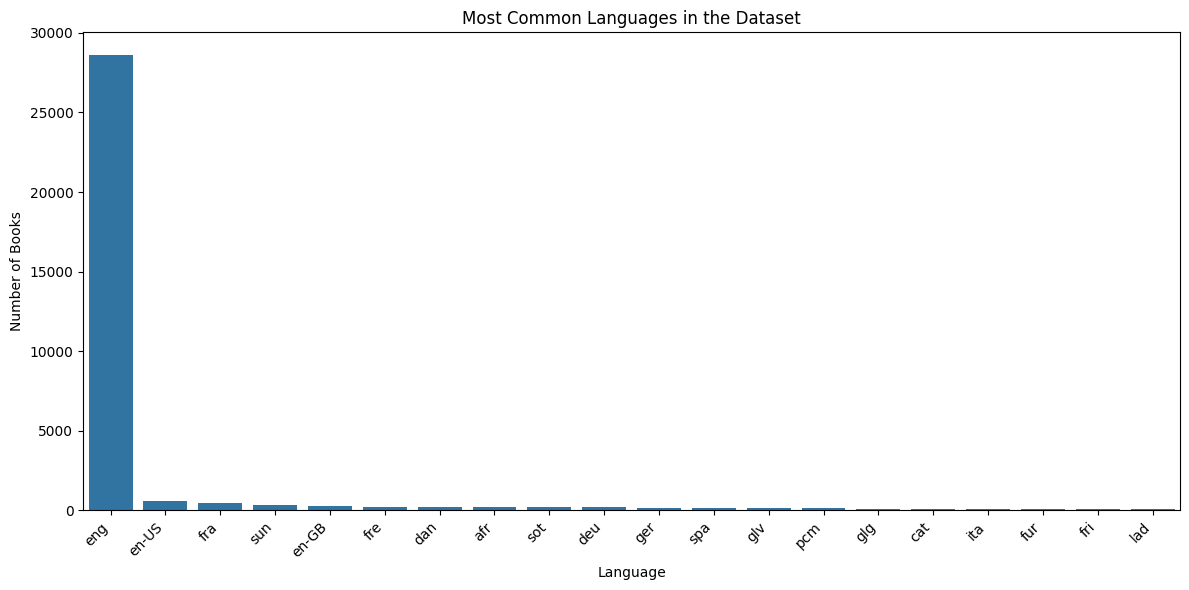

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


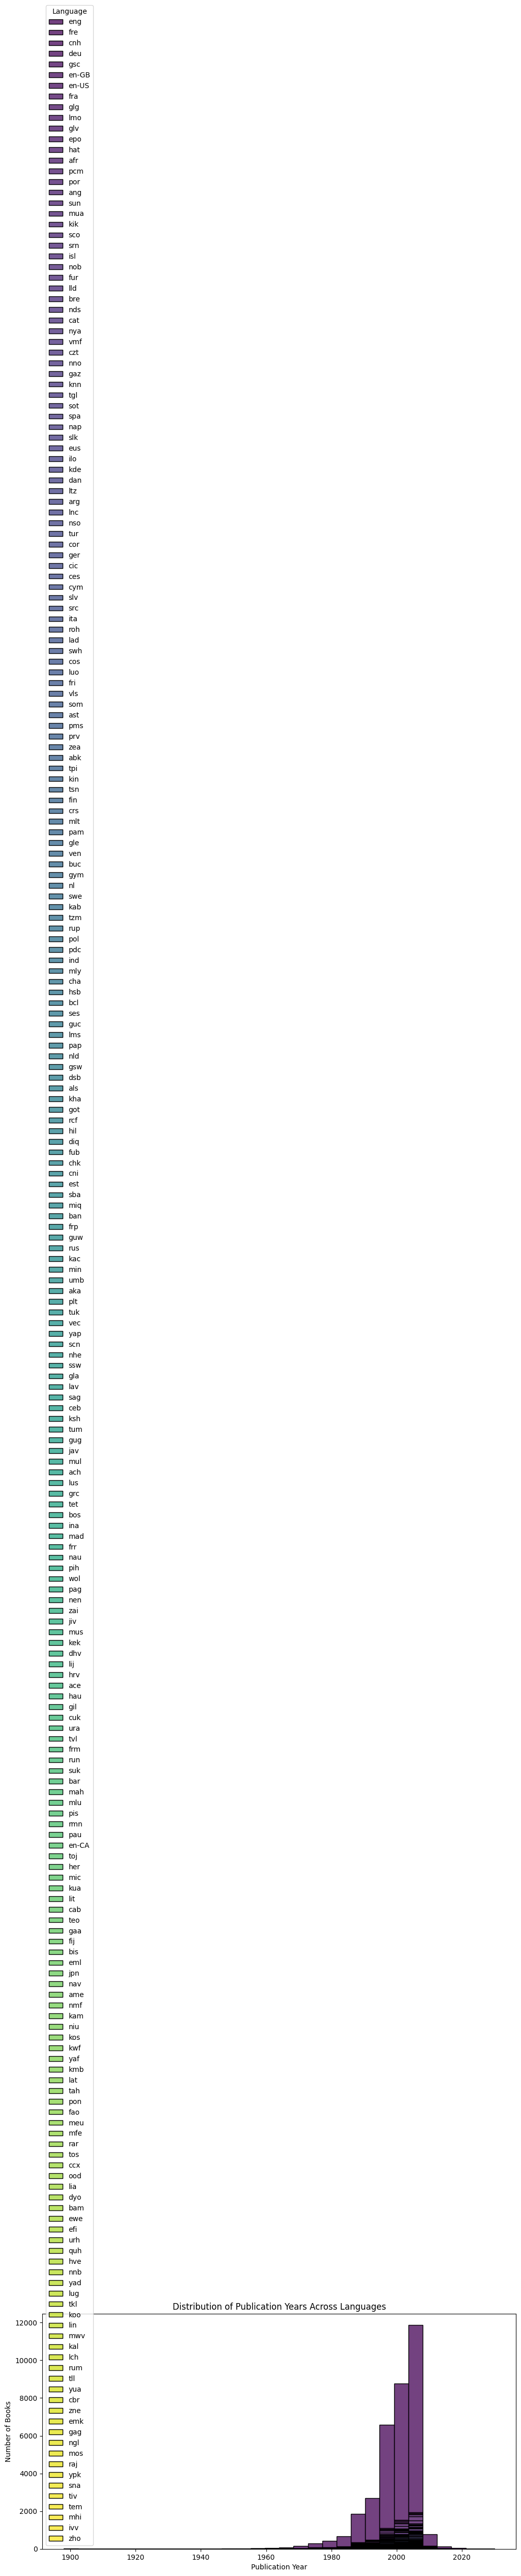

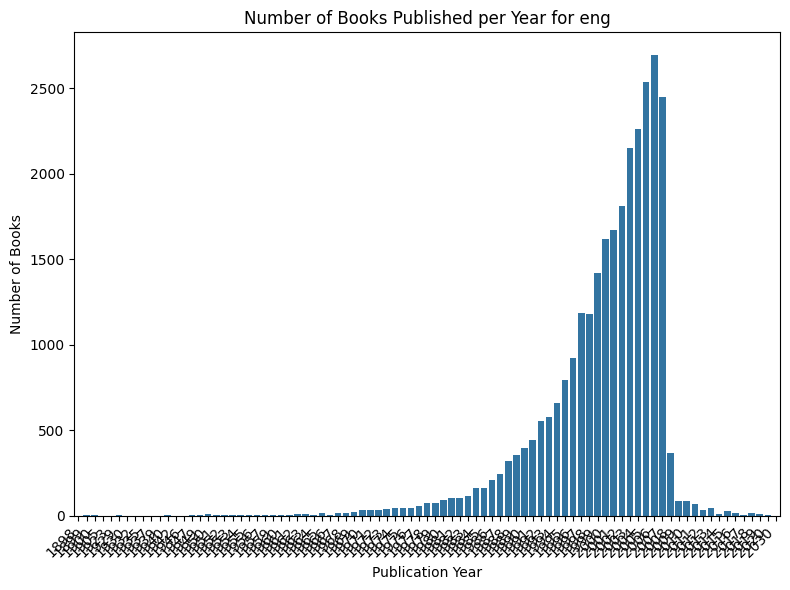

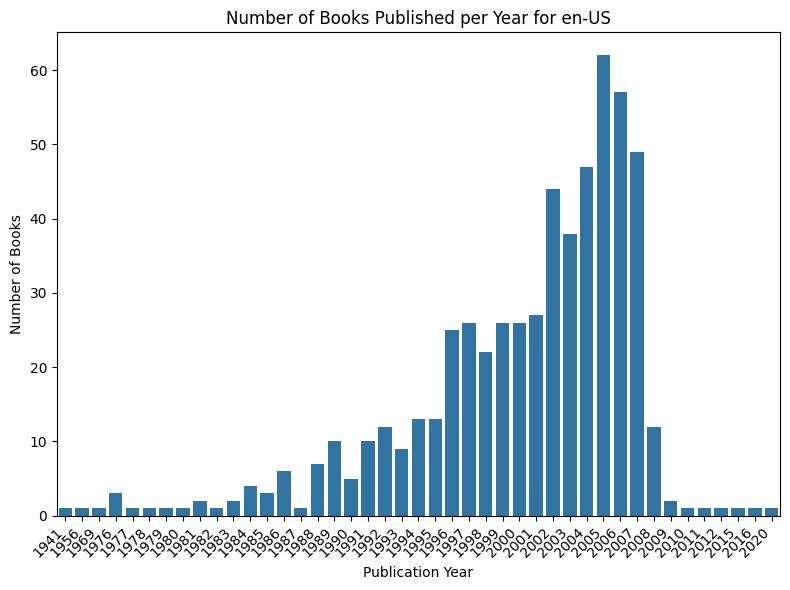

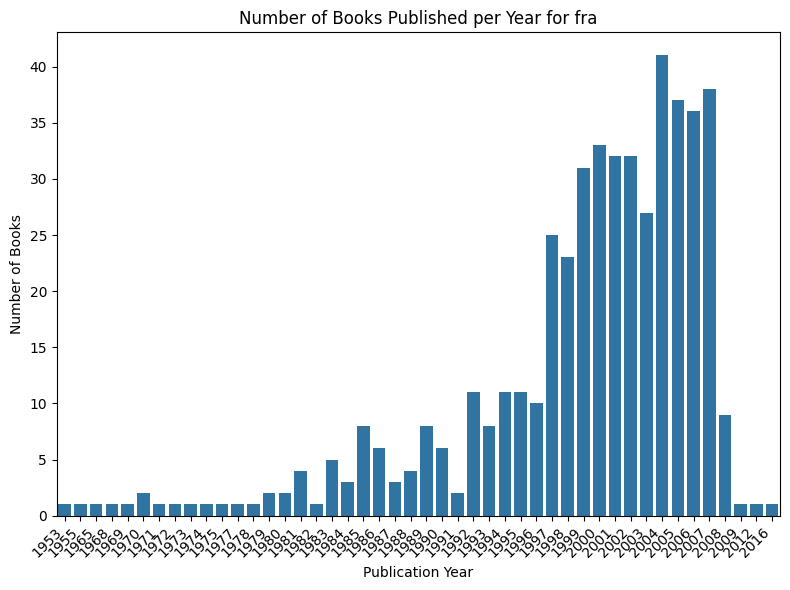

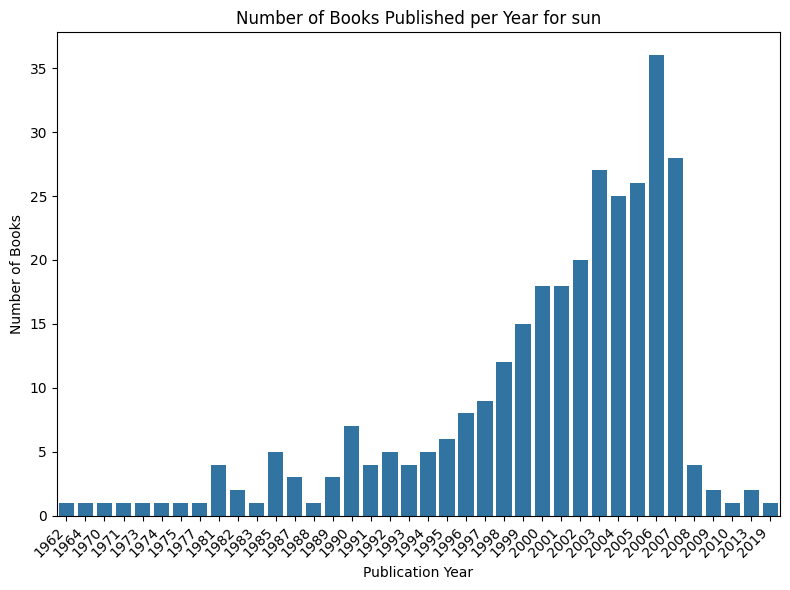

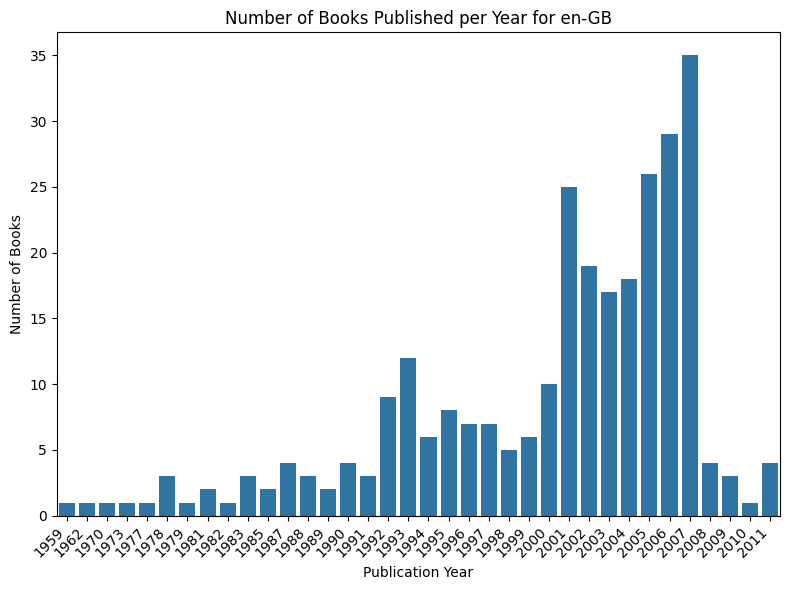

In [58]:
# prompt: Using dataframe eda_data: make common word in language table plot and generate more and more plots for difffrant analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each language
language_counts = eda_data['Language'].value_counts()

# Create a bar plot of the most common languages
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.index[:20], y=language_counts.values[:20])
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.title('Most Common Languages in the Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


#Further analysis plots

#1.  Distribution of Publication Years for different Languages
plt.figure(figsize=(12,6))
sns.histplot(data=eda_data, x='PublishYear', hue='Language', multiple="stack", palette="viridis", bins=30)
plt.xlabel('Publication Year')
plt.ylabel('Number of Books')
plt.title('Distribution of Publication Years Across Languages')
plt.show()


#2.  Number of books published per year for the top 5 languages
top_5_languages = language_counts.index[:5]
for lang in top_5_languages:
    lang_data = eda_data[eda_data['Language']==lang]
    plt.figure(figsize=(8,6))
    sns.countplot(data=lang_data, x='PublishYear')
    plt.xlabel("Publication Year")
    plt.ylabel("Number of Books")
    plt.title(f"Number of Books Published per Year for {lang}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

---
### Save Preprocessed Data

In [55]:
eda_data.to_csv("data/preprocessed.csv", sep=",", index=False)